In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import os
import sys
%matplotlib inline
from scipy import optimize
fitfunc = lambda p, x: p[0]+0*x
errfunc = lambda p, x, y, err: (y - fitfunc(p,x)) / err
pinit = [1.0, -1.0]
def column(matrix, i):
    return [row[i] for row in matrix]
## Replace my path with your path here
path="/export/data1/caplarn/Documents/Gender/Web/"

In [45]:
##Main body of the code below

In [9]:
##Setting up
X=pd.read_csv(path+"Male_Train.csv")
y=X.pop("Citations")
categorical_variables=['Journal','Field','Region']
for variable in categorical_variables:
    X[variable].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(X[variable],prefix=variable)
    X=pd.concat([X,dummies],axis=1)
    X.drop([variable],axis=1,inplace=True)
XTest=pd.read_csv(path+"Male_Test.csv")
yTest=XTest.pop("Citations")
categorical_variables=['Journal','Field','Region']
for variable in categorical_variables:
    XTest[variable].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(XTest[variable],prefix=variable)
    XTest=pd.concat([XTest,dummies],axis=1)
    XTest.drop([variable],axis=1,inplace=True)  
XFemale=pd.read_csv(path+"Female.csv")
yFemale=XFemale.pop("Citations")
categorical_variables=['Journal','Field','Region']
for variable in categorical_variables:
    XFemale[variable].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(XFemale[variable],prefix=variable)
    XFemale=pd.concat([XFemale,dummies],axis=1)
    XFemale.drop([variable],axis=1,inplace=True)
number_len_females=[]
for i in range(1959,2016):
    number_len_females.append(len(XFemale.loc[XFemale['Year']==i]))
    
##Testing the code     
os.chdir(path)
model=RandomForestRegressor(n_estimators=50,oob_score=True,n_jobs=-1,random_state=5,max_features=0.8,min_samples_leaf=20)
model.fit(X,y)
yTest=model.predict(XTest)
result_tranining_Testing=[]
for year in range(1959,2016):
    y_Single_Year=y[np.where(X['Year']==year)[0]]
    y_Single_Year_Simulated=yTest[np.where(XTest['Year']==year)[0]]
    help=[]
    for j in range(100):
        help.append(np.mean(y_Single_Year)/np.mean(np.random.choice(y_Single_Year_Simulated,min(len(y_Single_Year_Simulated),number_len_females[year-1959]),replace=True)))
    result_tranining_Testing.append((year,np.mean(help),np.std(help)))
xdata=np.array(column(result_tranining_Testing,0))
ydata=np.array(column(result_tranining_Testing,1))
yerrdata=np.array(column(result_tranining_Testing,2))
outfull = optimize.leastsq(errfunc, pinit,args=(xdata, ydata, yerrdata), full_output=1)
out85 = optimize.leastsq(errfunc, pinit,args=(xdata[26:], ydata[26:], yerrdata[26:]), full_output=1)
out00 = optimize.leastsq(errfunc, pinit,args=(xdata[41:], ydata[41:], yerrdata[41:]), full_output=1)
pfinal = [outfull[0][0],out85[0][0],out00[0][0]]
np.savetxt("Result.csv",[xdata,ydata,yerrdata], delimiter=",")
np.savetxt("pfinalResult.csv",pfinal, delimiter=",")

#Running the algorithm #
#This is the main part #
yFemaleP=model.predict(XFemale)
np.savetxt("yFemaleP.csv",yFemaleP, delimiter=",")

#To recreate Figure 6 use the output in the Wolfram Mathemtica file "Gender_Random_Forest_Visualization.nb"#
#Below are routines in python to compare male and female authors#


#Running comparions between the males and simulated females #
result_tranining_Female=[]
for year in range(1959,2016):
    y_Single_Year=y[np.where(X['Year']==year)[0]]
    y_Single_Year_Simulated=yFemaleP[np.where(XFemale['Year']==year)[0]]
    help=[]
    for j in range(100):
        help.append(np.mean(y_Single_Year)/np.mean(np.random.choice(y_Single_Year_Simulated,min(len(y_Single_Year_Simulated),number_len_females[year-1959]),replace=True)))
    result_tranining_Female.append((year,np.mean(help),np.std(help)))  
xdata=np.array(column(result_tranining_Female,0))
ydata=np.array(column(result_tranining_Female,1))
yerrdata=np.array(column(result_tranining_Female,2))
outfull = optimize.leastsq(errfunc, pinit,args=(xdata, ydata, yerrdata), full_output=1)
out85 = optimize.leastsq(errfunc, pinit,args=(xdata[26:], ydata[26:], yerrdata[26:]), full_output=1)
out00 = optimize.leastsq(errfunc, pinit,args=(xdata[41:], ydata[41:], yerrdata[41:]), full_output=1)
pfinal = [outfull[0][0],out85[0][0],out00[0][0]]
np.savetxt("malefemResult.csv",[xdata,ydata,yerrdata], delimiter=",")
np.savetxt("pfinalmalefemResult.csv",pfinal, delimiter=",")

#Running comparions between the females and the simulated females#
result_tranining_Female_Female=[]
for year in range(1959,2016):
    y_Single_Year=yFemale[np.where(XFemale['Year']==year)[0]]
    y_Single_Year_Simulated=yFemaleP[np.where(XFemale['Year']==year)[0]]
    help=[]
    for j in range(100):
        help.append(np.mean(y_Single_Year)/np.mean(np.random.choice(y_Single_Year_Simulated,min(len(y_Single_Year_Simulated),number_len_females[year-1959]),replace=True)))
    result_tranining_Female_Female.append((year,np.mean(help),np.std(help)))  
xdata=np.array(column(result_tranining_Female_Female,0))
ydata=np.array(column(result_tranining_Female_Female,1))
yerrdata=np.array(column(result_tranining_Female_Female,2))
outfull = optimize.leastsq(errfunc, pinit,args=(xdata, ydata, yerrdata), full_output=1)
out85 = optimize.leastsq(errfunc, pinit,args=(xdata[26:], ydata[26:], yerrdata[26:]), full_output=1)
out00 = optimize.leastsq(errfunc, pinit,args=(xdata[41:], ydata[41:], yerrdata[41:]), full_output=1)
pfinal = [outfull[0][0],out85[0][0],out00[0][0]]
np.savetxt("femaleResult.csv",[xdata,ydata,yerrdata], delimiter=",")
np.savetxt("pfinalfemaleResult.csv",pfinal, delimiter=",")




In [ ]:
##Function to show importance of each property

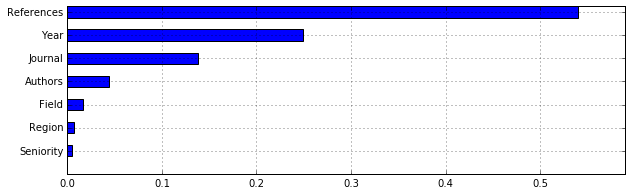

In [6]:
def graph_feature_importances(model,feature_names,autoscale=True,headroom=0.05,width=10,summarized_columns=None):
    if autoscale:
        x_scale=model.feature_importances_.max()+headroom
    else:
        x_scale=1
        
    feature_dict=dict(zip(feature_names,model.feature_importances_)) 
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value=sum(x for i, x in feature_dict.iteritems() if col_name in i)
            keys_to_remove=[i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name]=sum_value
            
    results=pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/2),xlim=(0,x_scale))
    
    
graph_feature_importances(model,X.columns,summarized_columns=categorical_variables)